In [5]:
#Predicting the Sale Price of the Bulldozers Using ML
#1. Problem Definition
##How well we can predict the sales price of the data based on the previous data
#2. Data is downloaded from the kaggle website (https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview
## There are three main datasets 
### Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
### Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
### Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).

#3. Evaluation
## The evaluation metric id the RMSLE between actual and prediction prices.

#4. Feature
## Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

## One of the most common ways to do this, is to create a data dictionary.

## For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can download this file directly from the Kaggle competition page (account required) or view it on Google Sheets.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
 #Import the training and validation data
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

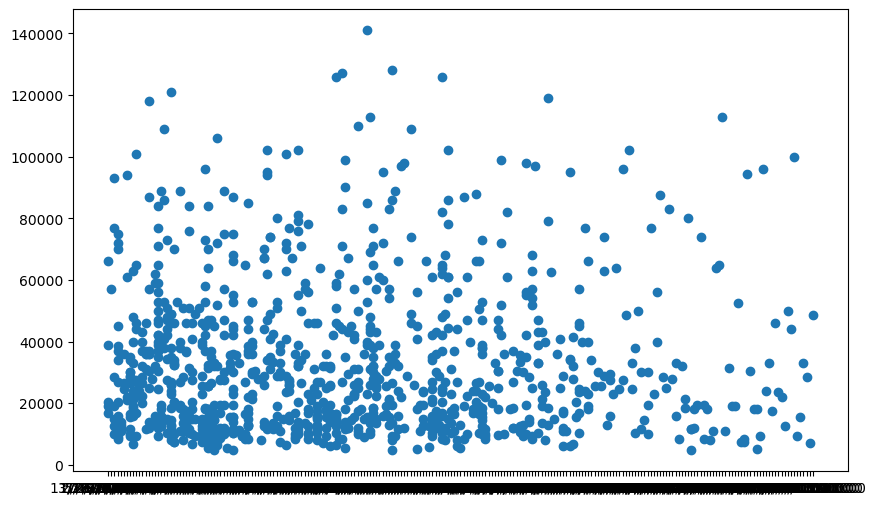

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

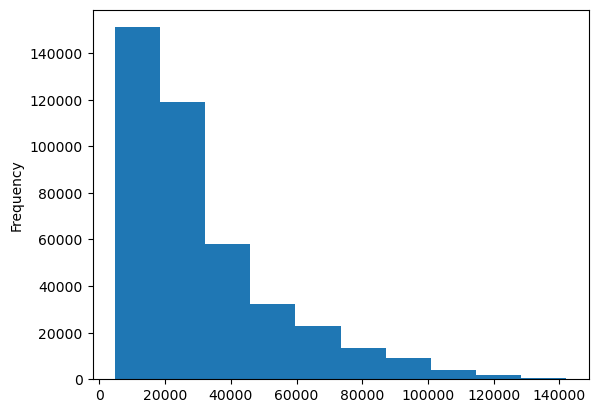

In [13]:
df.SalePrice.plot.hist()

In [18]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [20]:
##Parsing the data
#When we work with time series data, we want to enrich the time & date componet as much as possible
df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

In [22]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False, parse_dates =["saledate"])

In [24]:
df.saledate.dtype

dtype('<M8[ns]')

In [26]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

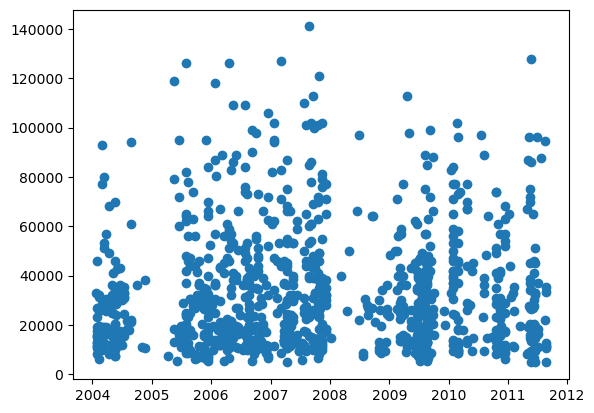

In [28]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [29]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [34]:
## Sort DatFrame by saledate
df.sort_values(by =["saledate"], inplace = True, ascending =True)
df.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [35]:
##Make a copy of the original DATAFRAME
## We make a copy of the original data frame so we can revert it whenever we want to

In [38]:
df_tmp = df.copy()
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Add datatime parameters for saledate column
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.dayofyear

In [49]:
df_tmp.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,WA150,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,D7F,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,966C,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [51]:
##Now we have enriched the datafrme with day time feature, we candrop the saledate
df_tmp.drop("saledate", axis=1, inplace=True)

KeyError: "['saledate'] not found in axis"

In [53]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,WA150,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,D7F,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,966C,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [54]:
##5. Modelling
# We can alwayd do more but start the modelling

In [119]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor(n_jobs = -1)
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

RandomForestRegressor(n_jobs=-1)

In [61]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [63]:
df_tmp["UsageBand"].dtype

dtype('O')

In [67]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [68]:
## Convert string to categories
#One way we can turn all of our data into numbers is by converting them into pandas categories

In [71]:
#Checkimg the dtype and refer more to the pandas documentation
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [73]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [76]:
#This will turn all of the strings value into the category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
    

In [77]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [81]:

#percentage of the data missing
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [85]:
#Save preprocessed data
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

In [89]:
#Import preprocessed data
df_tmp= pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,WA150,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
2,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,D7F,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,966C,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [90]:
#fillin the missing values

In [92]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [93]:
#fill numerical missing values first

In [96]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [98]:
# Check for which numeric colums have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [101]:
#fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,NaN,WA150,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
2,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,NaN,D7F,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,NaN,966C,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,NaN,416,...,NaN,NaN,NaN,1989,1,31,1,31,False,True


In [104]:
##Fiiliing the categorial variables into number
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add library
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes + 1

In [106]:
pd.Categorical(content).codes + 1

array([2, 2, 2, ..., 2, 2, 1], dtype=int8)

In [109]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [111]:
df_tmp.head().T


,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [115]:
df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

In [120]:
#Data is numeric and there is not missing value
%time
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model = RandomForestRegressor(n_jobs = -1)
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 μs


RandomForestRegressor(n_jobs=-1)

In [121]:
#Score the model
model.score(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

0.9875966080326709

In [125]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [128]:
#Split the data into train and valid
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [130]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((401125, 102), (401125,), (11573, 102), (11573,))

In [133]:
y_train

0          9500.0
1         30000.0
2         21000.0
3         33000.0
4         24000.0
           ...   
401120    34500.0
401121    19000.0
401122    24000.0
401123    18000.0
401124    24000.0
Name: SalePrice, Length: 401125, dtype: float64

In [134]:
#building an evaluation function

In [137]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
def rmsle(y_test, y_preds):
    '''
    Calculate the root mean squared log error between prediction and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
#Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [139]:
#Testing our model on a subset (to tune the hyperparameters)
#This will take a lot of the time..for experimenting
#model.fit(X_train, y_train)

In [141]:
len(X_train)

401125

In [142]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

In [144]:
#Cutting down the time
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [147]:
show_scores(model)

{'Training MAE': 5551.878676023683,
 'Valid MAE': 7144.402618162965,
 'Training RMSLE': 0.2573328120233112,
 'Valid RMSLE': 0.29336506067668766,
 'Training R^2': 0.8610364790331544,
 'Valid R^2': 0.8340129869623211}

In [150]:
##Hyperparameter tuning with RandomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/admin/Desktop/sample_project/Bulldozer_Price_Prediction/env/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [152]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [154]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 5858.840270748878,
 'Valid MAE': 7199.5673293103655,
 'Training RMSLE': 0.2675934572366372,
 'Valid RMSLE': 0.29347157379330346,
 'Training R^2': 0.8462474708786207,
 'Valid R^2': 0.8309078748345751}

In [156]:
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42
                                   )
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [160]:
show_scores(ideal_model)

{'Training MAE': 2956.4887000110048,
 'Valid MAE': 5957.457704159022,
 'Training RMSLE': 0.14448478225577732,
 'Valid RMSLE': 0.24544663828024385,
 'Training R^2': 0.9587936671021189,
 'Valid R^2': 0.8820814857765893}

In [165]:
## Make predictions on the Test Data
##Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                      parse_dates=["saledate"],low_memory= False)
df_test.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
#make predictions on the test datasets
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- SalePrice
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [174]:
#Preprocessing the data
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    # df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [177]:
df_test = preprocess_data(df_test)
df_test.head()

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [172]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1728883,1523610,9105,132,99.0,1986,0.0,0,4772,1852,...,True,True,True,True,True,True,True,True,True,True
2,1508502,1153157,4138,132,99.0,1972,0.0,0,2347,713,...,True,True,True,True,True,False,False,False,True,True
3,1452578,1544443,3854,132,99.0,1974,0.0,0,1767,535,...,True,True,True,True,True,True,True,True,False,False
4,1403418,1390168,7110,132,99.0,1986,0.0,0,744,245,...,True,True,True,True,True,True,True,True,True,True


In [178]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- SalePrice
- saleDayofweek
- saleDayofyear
Feature names seen at fit time, yet now missing:
- saleDayOfWeek
- saleDayOfYear


In [181]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.15414823e-02, 1.99479809e-02, 4.54712559e-02, 1.90514307e-03,
       3.40436007e-03, 2.03055338e-01, 3.20937511e-03, 9.80203151e-04,
       4.03804074e-02, 4.09729014e-02, 6.07614597e-02, 4.53352387e-03,
       1.65881480e-02, 1.56632161e-01, 4.51592711e-02, 5.92951020e-03,
       2.17647288e-03, 4.89432486e-03, 3.33540585e-03, 6.05718935e-02,
       5.18390347e-04, 5.14462344e-05, 8.33786888e-04, 1.98674292e-04,
       1.01490464e-03, 2.41532133e-05, 6.14887534e-03, 8.96349014e-03,
       2.67536372e-03, 1.67263555e-04, 5.80998016e-03, 3.68398035e-03,
       4.56685713e-03, 2.99838744e-03, 3.00346844e-04, 4.22237672e-03,
       8.83925334e-04, 1.85417888e-02, 7.58409741e-04, 2.36577120e-03,
       9.38522565e-04, 8.50062978e-04, 2.53147871e-03, 5.92189591e-04,
       5.23013441e-04, 3.64473747e-04, 3.90509324e-04, 1.60955258e-03,
       9.86169971e-04, 2.37251098e-04, 3.03409289e-04, 7.37648620e-02,
       3.77698559e-03, 5.71902807e-03, 2.90512974e-03, 9.83078391e-03,
      

In [190]:
#importing the seaborn for represting the visuals representation
#%conda install -c conda-forge seaborn

In [188]:
# Install Seaborn package in current environment (if you don't have it)
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/admin/Desktop/sample_project/Bulldozer_Price_Prediction/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-base-0.13.2        |     pyhd8ed1ab_0         229 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         229 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2024.8.30~ --> pkgs/main/osx-arm64::certifi-2024.8.30-py312hca03da5_0 
  seaborn            conda-forge/noarch::seaborn-0.13.2-hd~ --> pkgs/main/osx-arm64::seaborn-0.13.2-py312hca03da5_0 

The following packages will be DOWNGRADED:

  seaborn-base                          0.13.2-pyhd8ed1

In [193]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

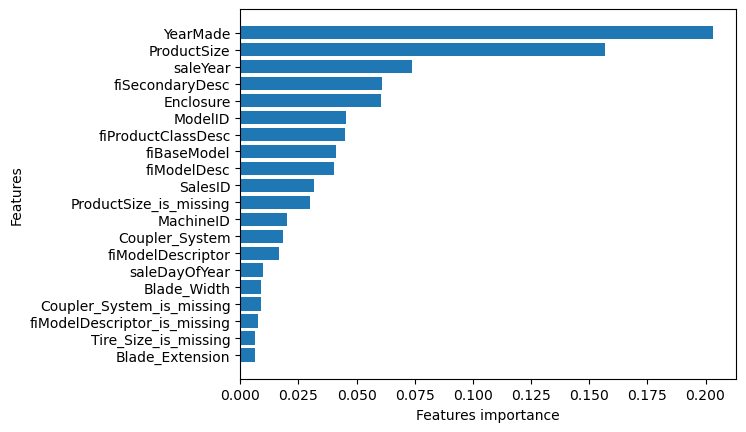

In [200]:
feature_importances = ideal_model.feature_importances_
feature_importances
def plot_features(columns, feature_importances, n=20): #to plot the top 20 values out of the 102
    feature_importances_df = (pd.DataFrame({
        "features": columns,
        "feature_importances": feature_importances
    }).sort_values("feature_importances", ascending=False).reset_index(drop=True))

    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(feature_importances_df["features"][:n], feature_importances_df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importance")
    ax.invert_yaxis()
plot_features(X_train.columns, feature_importances, n=20)